## This is for 3 rock types

to-do:
- put all important plots here
- update the font size to 6pt

In [1]:
all_models = {
    'SVM': {
        1: (0.8818, 0.0126),
        2: (0.8927, 0.0087),
        3: (0.8802, 0.0107),
        4: (0.8978, 0.0093),
        5: (0.8692, 0.0119)
    },
    'Random Forest': {
        1: (0.9551, 0.0136),
        2: (0.9571, 0.0112),
        3: (0.9575, 0.0103),
        4: (0.9579, 0.0094),
        5: (0.9648, 0.0096)
    },
    'MLP': {
        1: (0.9726, 0.0079),
        2: (0.9604, 0.0107),
        3: (0.9571, 0.0125),
        4: (0.9648, 0.0092),
        5: (0.9575, 0.0099)
    },
    '1D-CNN': {
        1: (0.9835, 0.0072),
        2: (0.9850, 0.0030),
        3: (0.9842, 0.0070),
        4: (0.9824, 0.0061),
        5: (0.9832, 0.0050)
    },
    '1D-CNN-UNK': {
        1: (0.9825, 0.0063),
        2: (0.9758, 0.0029),
        3: (0.9707, 0.0080),
        4: (0.9839, 0.0060),
        5: (0.9744, 0.0175)
    }
}


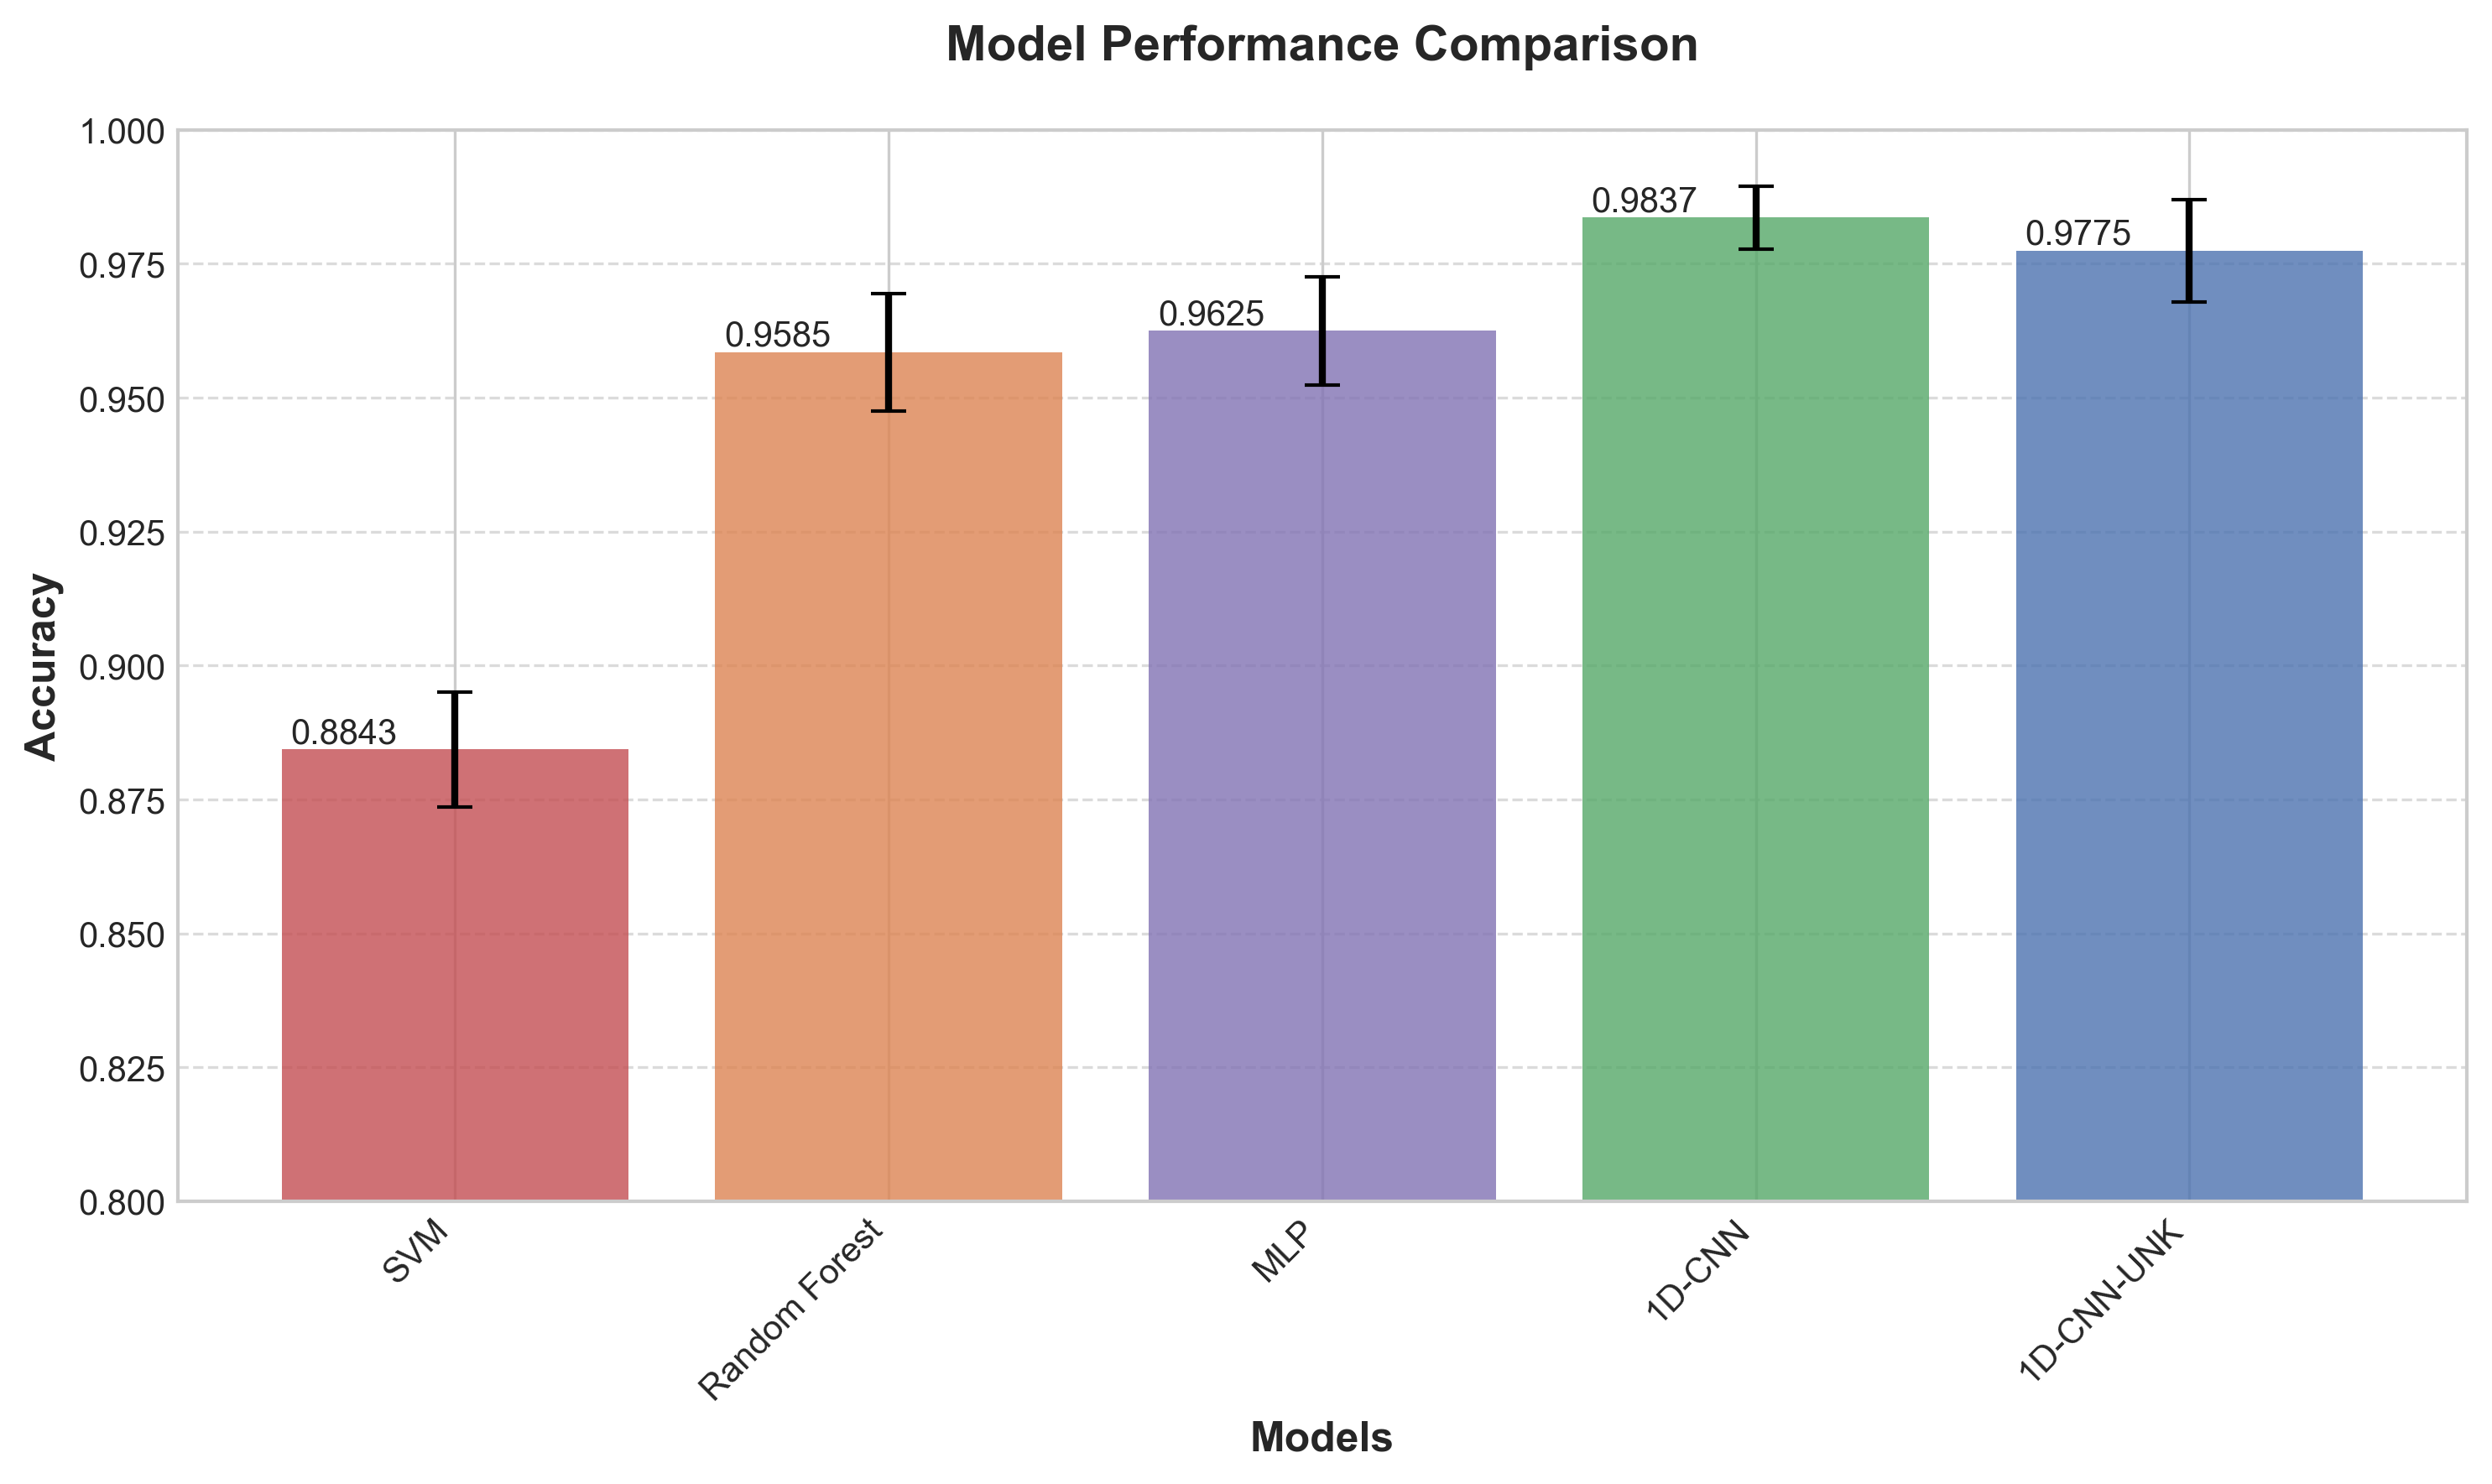

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_comparison(all_models, save_path=None):
    """
    Create a publication-quality bar plot comparing model performances.
    
    Parameters:
    all_models (dict): Dictionary containing model results
    save_path (str): Optional path to save the figure
    """
    # Set style for publication-quality plot
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("deep")
    
    # Calculate means and errors for each model
    models = []
    means = []
    errors = []
    
    for model_name, results in all_models.items():
        # Extract accuracies and stds
        accuracies = [results[i][0] for i in range(1, len(results) + 1)]
        stds = [results[i][1] for i in range(1, len(results) + 1)]
        
        models.append(model_name)
        means.append(np.mean(accuracies))
        # Calculate standard error
        errors.append(np.sqrt(np.mean(np.array(stds)**2)))
    
    # Create figure with appropriate size and DPI for publication
    plt.figure(figsize=(10, 6), dpi=300)

    # Create a color map for each unique model
    unique_models = list(set([model.split('_')[0] for model in models]))  # Get base model names
    color_map = dict(zip(unique_models, sns.color_palette("deep", len(unique_models))))

    # Assign colors based on base model names
    colors = [color_map[model.split('_')[0]] for model in models]

    # Create bar plot with mapped colors
    bars = plt.bar(models, means, yerr=errors, capsize=5,
                alpha=0.8, ecolor='black', error_kw={'elinewidth': 2},
                color=colors)
    
    # # Create bar plot
    # bars = plt.bar(models, means, yerr=errors, capsize=5, 
    #                alpha=0.8, ecolor='black', error_kw={'elinewidth': 2})
    
    # Customize plot
    plt.xlabel('Models', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
    plt.title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Set y-axis limits to focus on relevant range
    plt.ylim(0.8, 1.0)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/3., height,
                f'{height:.4f}',
                ha='right', va='bottom')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Add grid for easier reading
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Save figure if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        
    return plt.gcf()


# Create and save the plot
fig = plot_model_comparison(all_models, 'model-omparison.png')
plt.show()

In [4]:
## baseline result
ground_truth_data = [
    ['Anorthite', 'Orthoclase', 'Anorthite', 'Orthoclase', 'Albite', 'Sanidine', 'Orthoclase', 'Margarite', 'RRUFF_Magnesite', 'RRUFF_Roselite'],
    ['Orthoclase', 'Eastonite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Anorthite', 'Orthoclase', 'Phlogopite', 'RRUFF_Fayalite', 'RRUFF_FluorapophylliteK'],
    ['Anorthite', 'Anorthite', 'Quartz', 'Eastonite', 'Sanidine', 'Margarite', 'Albite', 'Muscovite', 'RRUFF_Forsterite', 'RRUFF_Bournonite'],
    ['Orthoclase', 'Annite', 'Albite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Orthoclase', 'Annite', 'RRUFF_Gotzenite', 'RRUFF_Tephroite'],
    ['Margarite', 'Anorthite', 'Muscovite', 'Phlogopite', 'Orthoclase', 'Quartz', 'Annite', 'Quartz', 'RRUFF_Tsaregorodtsevite', 'RRUFF_Umohoite'],
    ['Muscovite', 'Anorthite', 'Annite', 'Orthoclase', 'Orthoclase', 'Annite', 'Phlogopite', 'Quartz', 'RRUFF_Emmonsite', 'RRUFF_Protoferroanthophyllite'],
    ['Eastonite', 'Anorthite', 'Quartz', 'Quartz', 'Quartz', 'Phlogopite', 'Annite', 'Albite', 'RRUFF_Clinohedrite', 'RRUFF_Maricite'],
    ['Muscovite', 'Phlogopite', 'Eastonite', 'Quartz', 'Sanidine', 'Orthoclase', 'Phlogopite', 'Margarite', 'RRUFF_Amblygonite', 'RRUFF_Marialite'],
    ['Muscovite', 'Orthoclase', 'Sanidine', 'Quartz', 'Muscovite', 'Orthoclase', 'Sanidine', 'Sanidine', 'RRUFF_Hydroxycalciomicrolite', 'RRUFF_Yugawaralite'],
    ['Eastonite', 'Phlogopite', 'Albite', 'Anorthite', 'Margarite', 'Margarite', 'Sanidine', 'Anorthite', 'RRUFF_Aegirine', 'RRUFF_Sengierite'],
]

predictions_data = [
    ['Anorthite', 'Orthoclase', 'Anorthite', 'Orthoclase', 'Albite', 'Sanidine', 'Orthoclase', 'Margarite', 'Albite', 'Albite'],
    ['Sanidine', 'Eastonite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Anorthite', 'Sanidine', 'Phlogopite', 'Albite', 'Anorthite'],
    ['Anorthite', 'Anorthite', 'Quartz', 'Eastonite', 'Sanidine', 'Margarite', 'Albite', 'Muscovite', 'Albite', 'Albite'],
    ['Orthoclase', 'Annite', 'Albite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Orthoclase', 'Annite', 'Anorthite', 'Albite'],
    ['Margarite', 'Anorthite', 'Muscovite', 'Phlogopite', 'Orthoclase', 'Quartz', 'Annite', 'Quartz', 'Sanidine', 'Anorthite'],
    ['Muscovite', 'Anorthite', 'Annite', 'Sanidine', 'Sanidine', 'Annite', 'Phlogopite', 'Quartz', 'Anorthite', 'Annite'],
    ['Eastonite', 'Anorthite', 'Quartz', 'Quartz', 'Quartz', 'Phlogopite', 'Annite', 'Albite', 'Anorthite', 'Anorthite'],
    ['Muscovite', 'Phlogopite', 'Eastonite', 'Quartz', 'Sanidine', 'Orthoclase', 'Phlogopite', 'Margarite', 'Albite', 'Quartz'],
    ['Muscovite', 'Sanidine', 'Sanidine', 'Quartz', 'Muscovite', 'Orthoclase', 'Sanidine', 'Sanidine', 'Anorthite', 'Anorthite'],
    ['Eastonite', 'Phlogopite', 'Albite', 'Anorthite', 'Margarite', 'Margarite', 'Sanidine', 'Anorthite', 'Anorthite', 'Sanidine'],
]

classification = ['Not Granite', 'Not Granite', 'Granite', 'Not Granite', 'Granite', 
                   'Granite', 'Granite', 'Granite', 'Granite', 'Not Granite']

accuracy = [80.0, 60.0, 80.0, 80.0, 80.0, 60.0, 80.0, 80.0, 70.0, 80.0]


In [5]:
## uncertainty-aware result
ua_ground_truth_data = [
    ['Anorthite', 'Orthoclase', 'Anorthite', 'Orthoclase', 'Albite', 'Sanidine', 'Orthoclase', 'Margarite', 'RRUFF_Magnesite', 'RRUFF_Roselite'],
    ['Orthoclase', 'Eastonite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Anorthite', 'Orthoclase', 'Phlogopite', 'RRUFF_Fayalite', 'RRUFF_FluorapophylliteK'],
    ['Anorthite', 'Anorthite', 'Quartz', 'Eastonite', 'Sanidine', 'Margarite', 'Albite', 'Muscovite', 'RRUFF_Forsterite', 'RRUFF_Bournonite'],
    ['Orthoclase', 'Annite', 'Albite', 'Orthoclase', 'Muscovite', 'Eastonite', 'Orthoclase', 'Annite', 'RRUFF_Gotzenite', 'RRUFF_Tephroite'],
    ['Margarite', 'Anorthite', 'Muscovite', 'Phlogopite', 'Orthoclase', 'Quartz', 'Annite', 'Quartz', 'RRUFF_Tsaregorodtsevite', 'RRUFF_Umohoite'],
    ['Muscovite', 'Anorthite', 'Annite', 'Orthoclase', 'Orthoclase', 'Annite', 'Phlogopite', 'Quartz', 'RRUFF_Emmonsite', 'RRUFF_Protoferroanthophyllite'],
    ['Eastonite', 'Anorthite', 'Quartz', 'Quartz', 'Quartz', 'Phlogopite', 'Annite', 'Albite', 'RRUFF_Clinohedrite', 'RRUFF_Maricite'],
    ['Muscovite', 'Phlogopite', 'Eastonite', 'Quartz', 'Sanidine', 'Orthoclase', 'Phlogopite', 'Margarite', 'RRUFF_Amblygonite', 'RRUFF_Marialite'],
    ['Muscovite', 'Orthoclase', 'Sanidine', 'Quartz', 'Muscovite', 'Orthoclase', 'Sanidine', 'Sanidine', 'RRUFF_Hydroxycalciomicrolite', 'RRUFF_Yugawaralite'],
    ['Eastonite', 'Phlogopite', 'Albite', 'Anorthite', 'Margarite', 'Margarite', 'Sanidine', 'Anorthite', 'RRUFF_Aegirine', 'RRUFF_Sengierite'],
]

ua_predictions_data = [
    ['Albite', 'Orthoclase', 'Anorthite', 'Orthoclase', 'Albite', 'Orthoclase', 'Orthoclase', 'Quartz', 'Albite', 'Albite'],
    ['Orthoclase', 'Phlogopite', 'Orthoclase', 'Muscovite', 'Phlogopite', 'Albite', 'Orthoclase', 'Phlogopite', 'Orthoclase', 'unknown'],
    ['Albite', 'Albite', 'Quartz', 'Phlogopite', 'Orthoclase', 'unknown', 'Albite', 'Muscovite', 'Albite', 'Orthoclase'],
    ['Orthoclase', 'Annite', 'Albite', 'Orthoclase', 'Muscovite', 'Phlogopite', 'Orthoclase', 'Annite', 'Orthoclase', 'Orthoclase'],
    ['Quartz', 'Albite', 'Muscovite', 'Phlogopite', 'Orthoclase', 'Quartz', 'Annite', 'Quartz', 'Anorthite', 'unknown'],
    ['Muscovite', 'Albite', 'Annite', 'Orthoclase', 'Orthoclase', 'Annite', 'Phlogopite', 'Quartz', 'unknown', 'Phlogopite'],
    ['Phlogopite', 'Anorthite', 'Quartz', 'Quartz', 'Quartz', 'Phlogopite', 'Annite', 'Albite', 'Albite', 'Anorthite'],
    ['Muscovite', 'Phlogopite', 'Phlogopite', 'Quartz', 'Orthoclase', 'Orthoclase', 'Phlogopite', 'Margarite', 'Albite', 'Quartz'],
    ['Muscovite', 'Orthoclase', 'Orthoclase', 'Quartz', 'Muscovite', 'Orthoclase', 'Orthoclase', 'Orthoclase', 'Orthoclase', 'Eastonite'],
    ['Phlogopite', 'Phlogopite', 'Albite', 'Anorthite', 'Quartz', 'Quartz', 'Orthoclase', 'Albite', 'Anorthite', 'unknown'],
]

ua_classification = ['Not Granite', 'Not Granite', 'Not Granite', 'Not Granite', 'Granite', 
                   'Granite', 'Granite', 'Granite', 'Not Granite', 'Not Granite']

ua_accuracy = [50.0, 55.6, 33.3, 70.0, 60.0, 77.8, 71.4, 66.0, 50.0, 37.5]


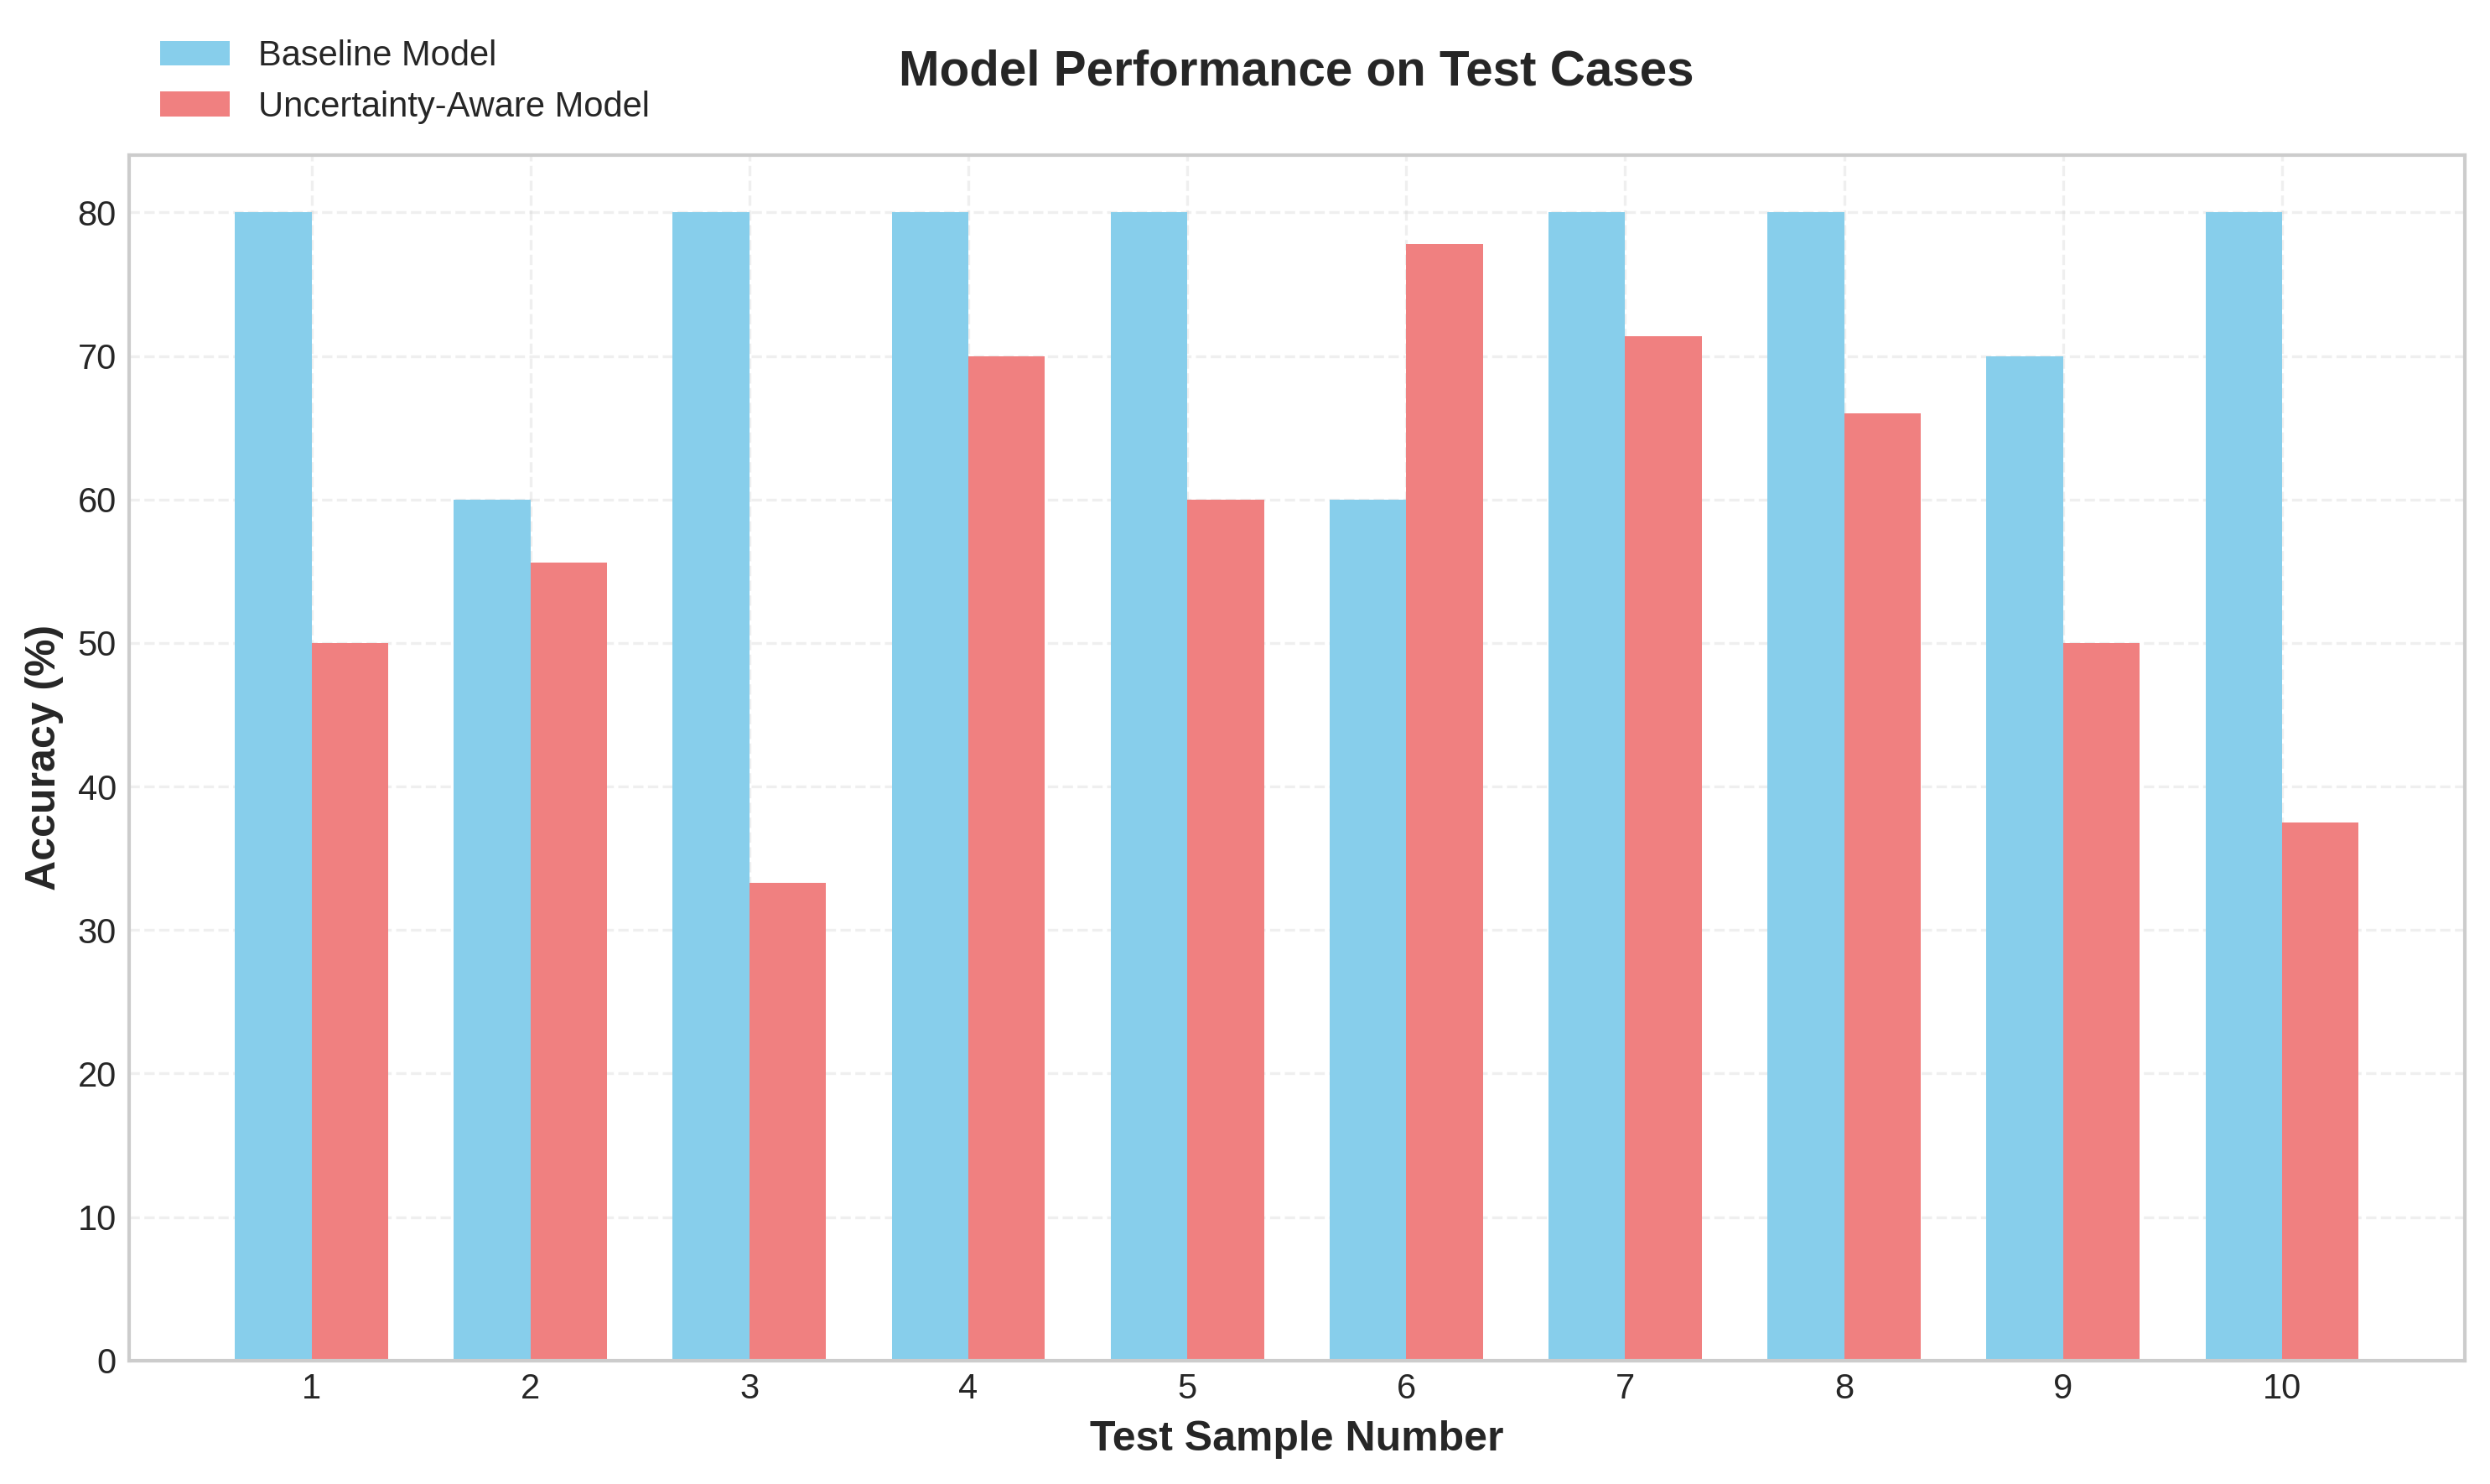

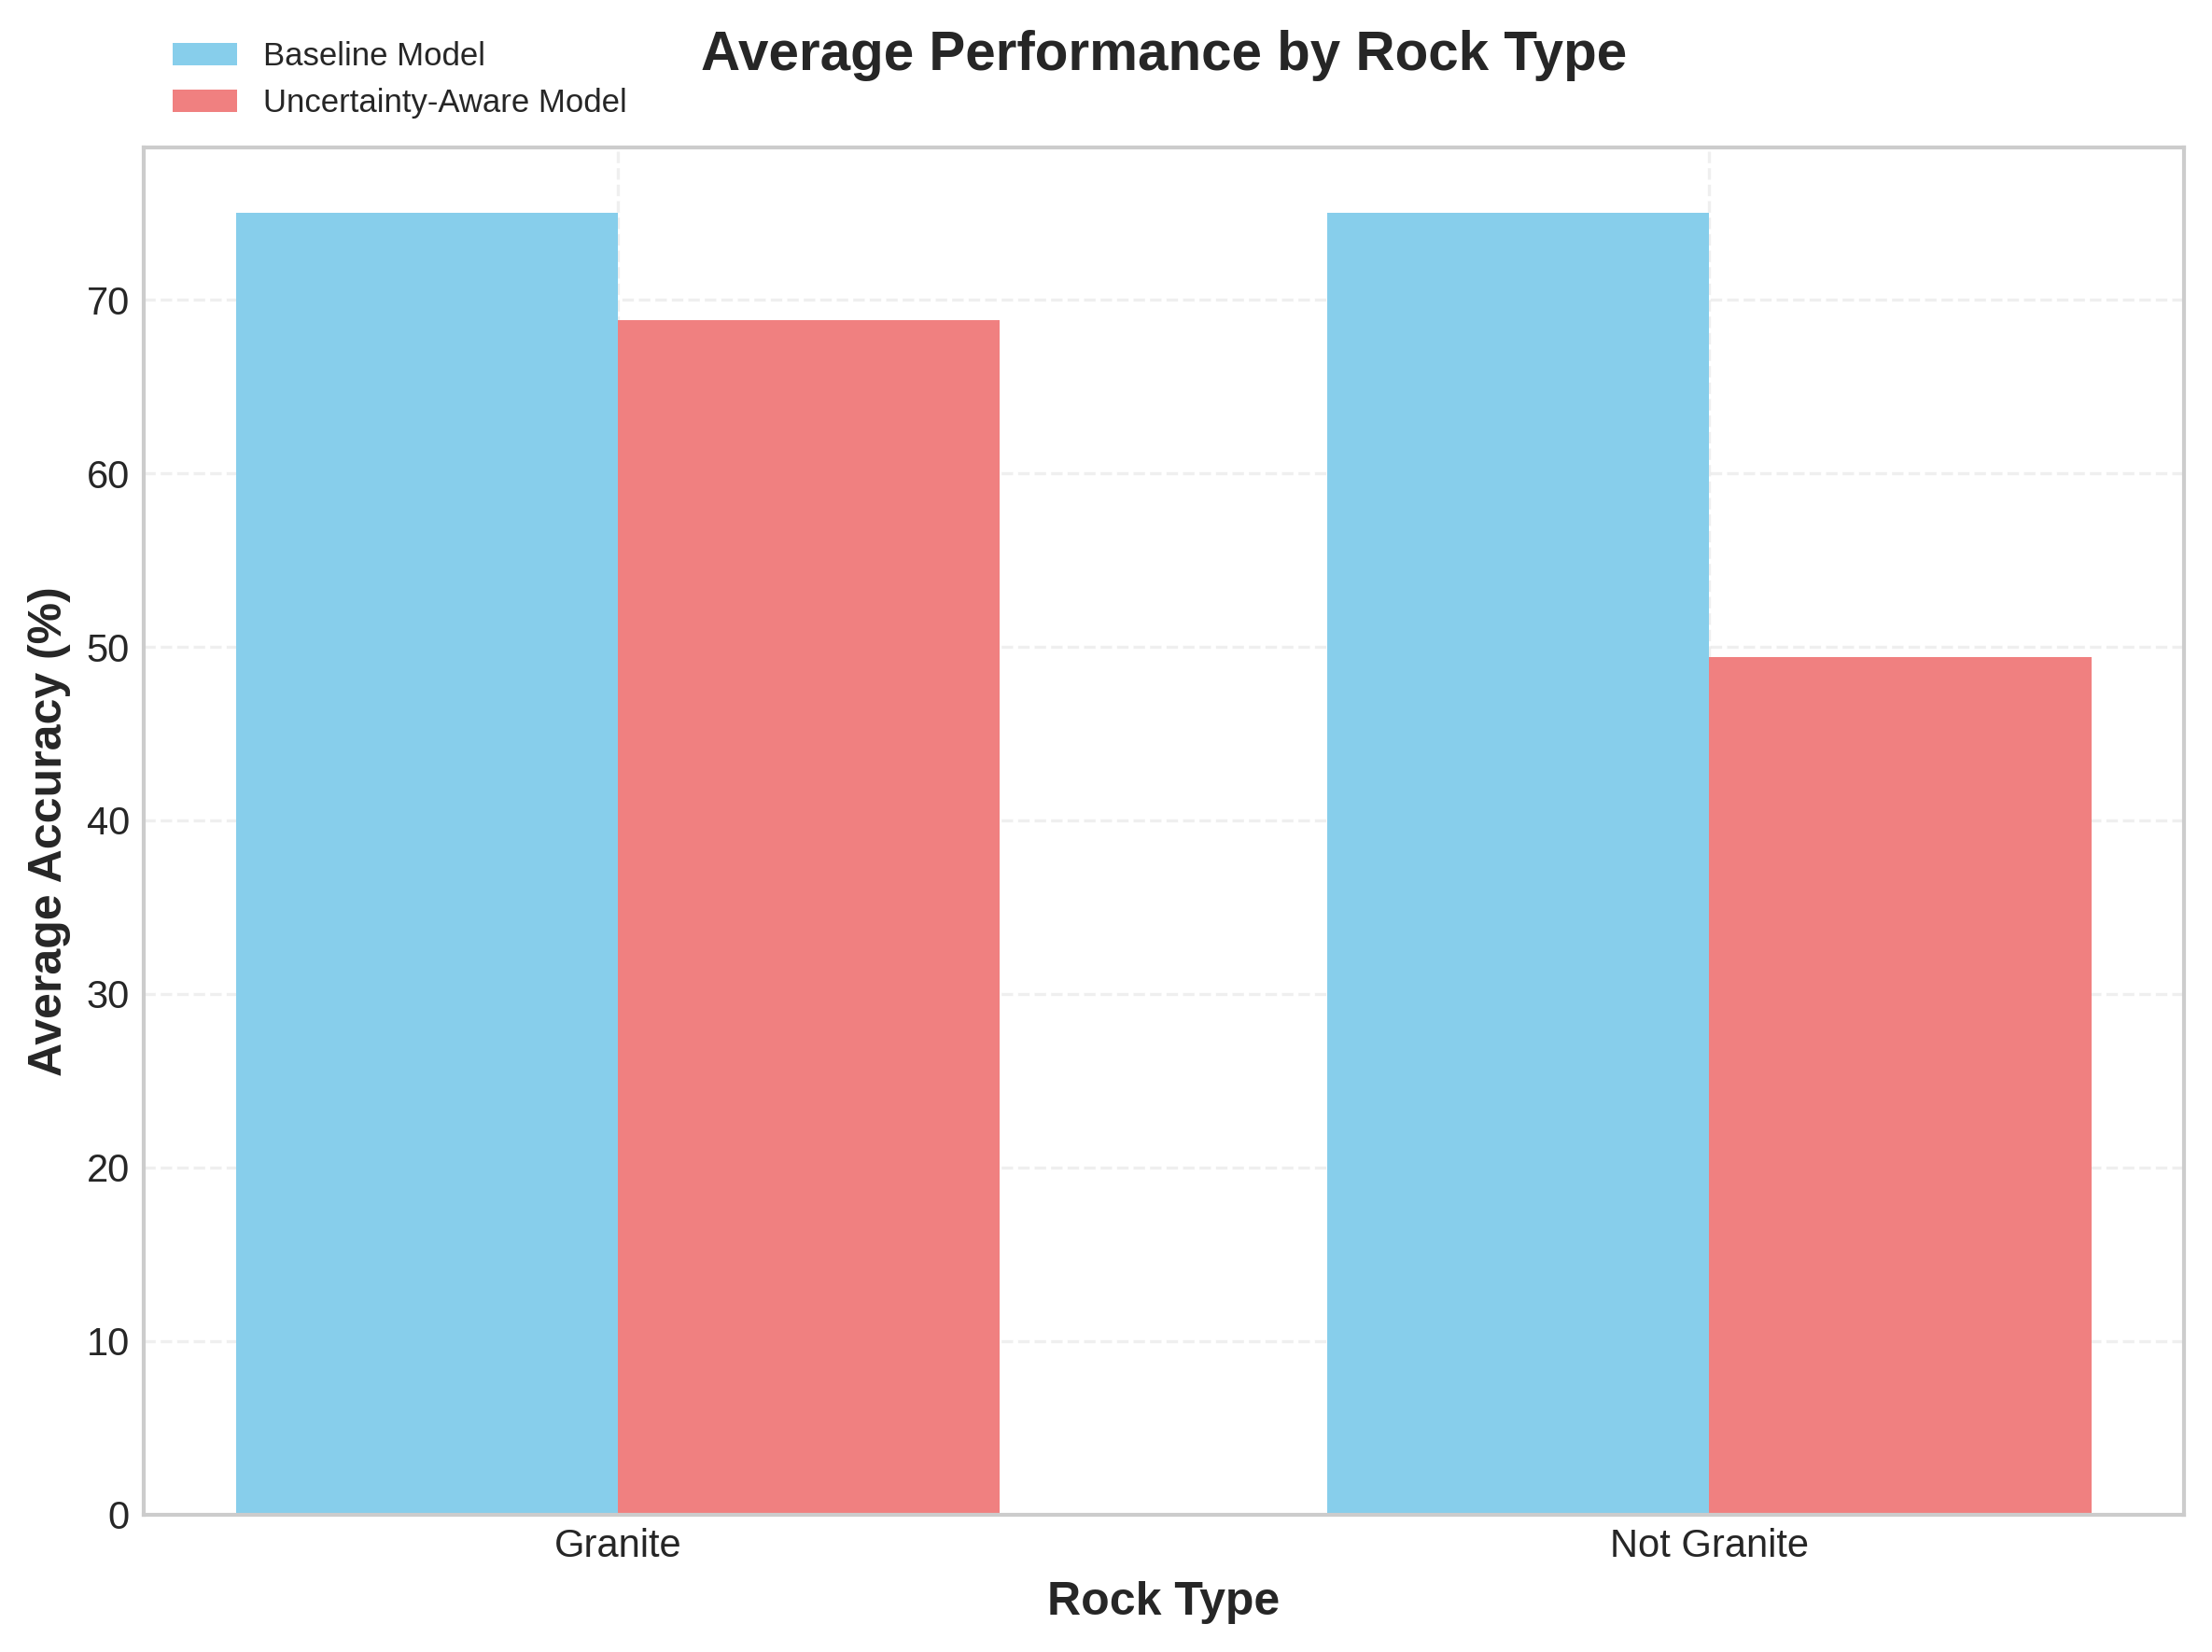

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for test results
test_results = pd.DataFrame({
    'Sample': range(1, 11),
    'True_Class': classification,
    'UA_True_Class': ua_classification,
    'Baseline_Accuracy': accuracy,
    'UA_Accuracy': ua_accuracy,
})


# 1. Test Cases Performance Comparison
plt.figure(figsize=(10, 6), dpi=300)
x = np.arange(len(test_results))
width = 0.35

plt.bar(x - width/2, test_results['Baseline_Accuracy'], width, label='Baseline Model', color='skyblue')
plt.bar(x + width/2, test_results['UA_Accuracy'], width, label='Uncertainty-Aware Model', color='lightcoral')

plt.xlabel('Test Sample Number', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Performance on Test Cases', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, test_results['Sample'])
plt.legend(bbox_to_anchor=(0, 1),loc='lower left',)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Performance by Rock Type
rock_type_performance = pd.DataFrame({
    'Rock_Type': ['Granite', 'Not Granite'],
    'Baseline': [
        test_results[test_results['True_Class'] == 'Granite']['Baseline_Accuracy'].mean(),
        test_results[test_results['True_Class'] == 'Not Granite']['Baseline_Accuracy'].mean()
    ],
    'Uncertainty_Aware': [
        test_results[test_results['UA_True_Class'] == 'Granite']['UA_Accuracy'].mean(),
        test_results[test_results['UA_True_Class'] == 'Not Granite']['UA_Accuracy'].mean()
    ]
})

plt.figure(figsize=(8, 6), dpi=300)
x = np.arange(len(rock_type_performance))
width = 0.35

plt.bar(x - width/2, rock_type_performance['Baseline'], width, label='Baseline Model', color='skyblue')
plt.bar(x + width/2, rock_type_performance['Uncertainty_Aware'], width, label='Uncertainty-Aware Model', color='lightcoral')

plt.xlabel('Rock Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Average Performance by Rock Type', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, rock_type_performance['Rock_Type'])
plt.legend(bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Test Case Mineral Detection Analysis
def create_mineral_accuracy_plot(ground_truth_data, predictions_data):
    mineral_accuracies = {}
    total_minerals = 0
    correct_minerals = 0
    
    for gt_sample, pred_sample in zip(ground_truth_data, predictions_data):
        for gt, pred in zip(gt_sample, pred_sample):
            if gt != "unknown":
                total_minerals += 1
                if gt == pred:
                    correct_minerals += 1
                    
                if gt not in mineral_accuracies:
                    mineral_accuracies[gt] = {"correct": 0, "total": 0}
                mineral_accuracies[gt]["total"] += 1
                if gt == pred:
                    mineral_accuracies[gt]["correct"] += 1

    # Calculate accuracies
    accuracy_data = {
        'Mineral': [],
        'Accuracy': []
    }
    for mineral, counts in mineral_accuracies.items():
        accuracy_data['Mineral'].append(mineral)
        accuracy_data['Accuracy'].append((counts['correct'] / counts['total']) * 100)

    # Create plot
    plt.figure(figsize=(10, 6), dpi=300)
    accuracy_df = pd.DataFrame(accuracy_data)
    sns.barplot(data=accuracy_df, x='Mineral', y='Accuracy', color='lightgreen')
    plt.title('Mineral Detection Accuracy in Test Cases')
    plt.xlabel('Mineral')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return total_minerals, correct_minerals


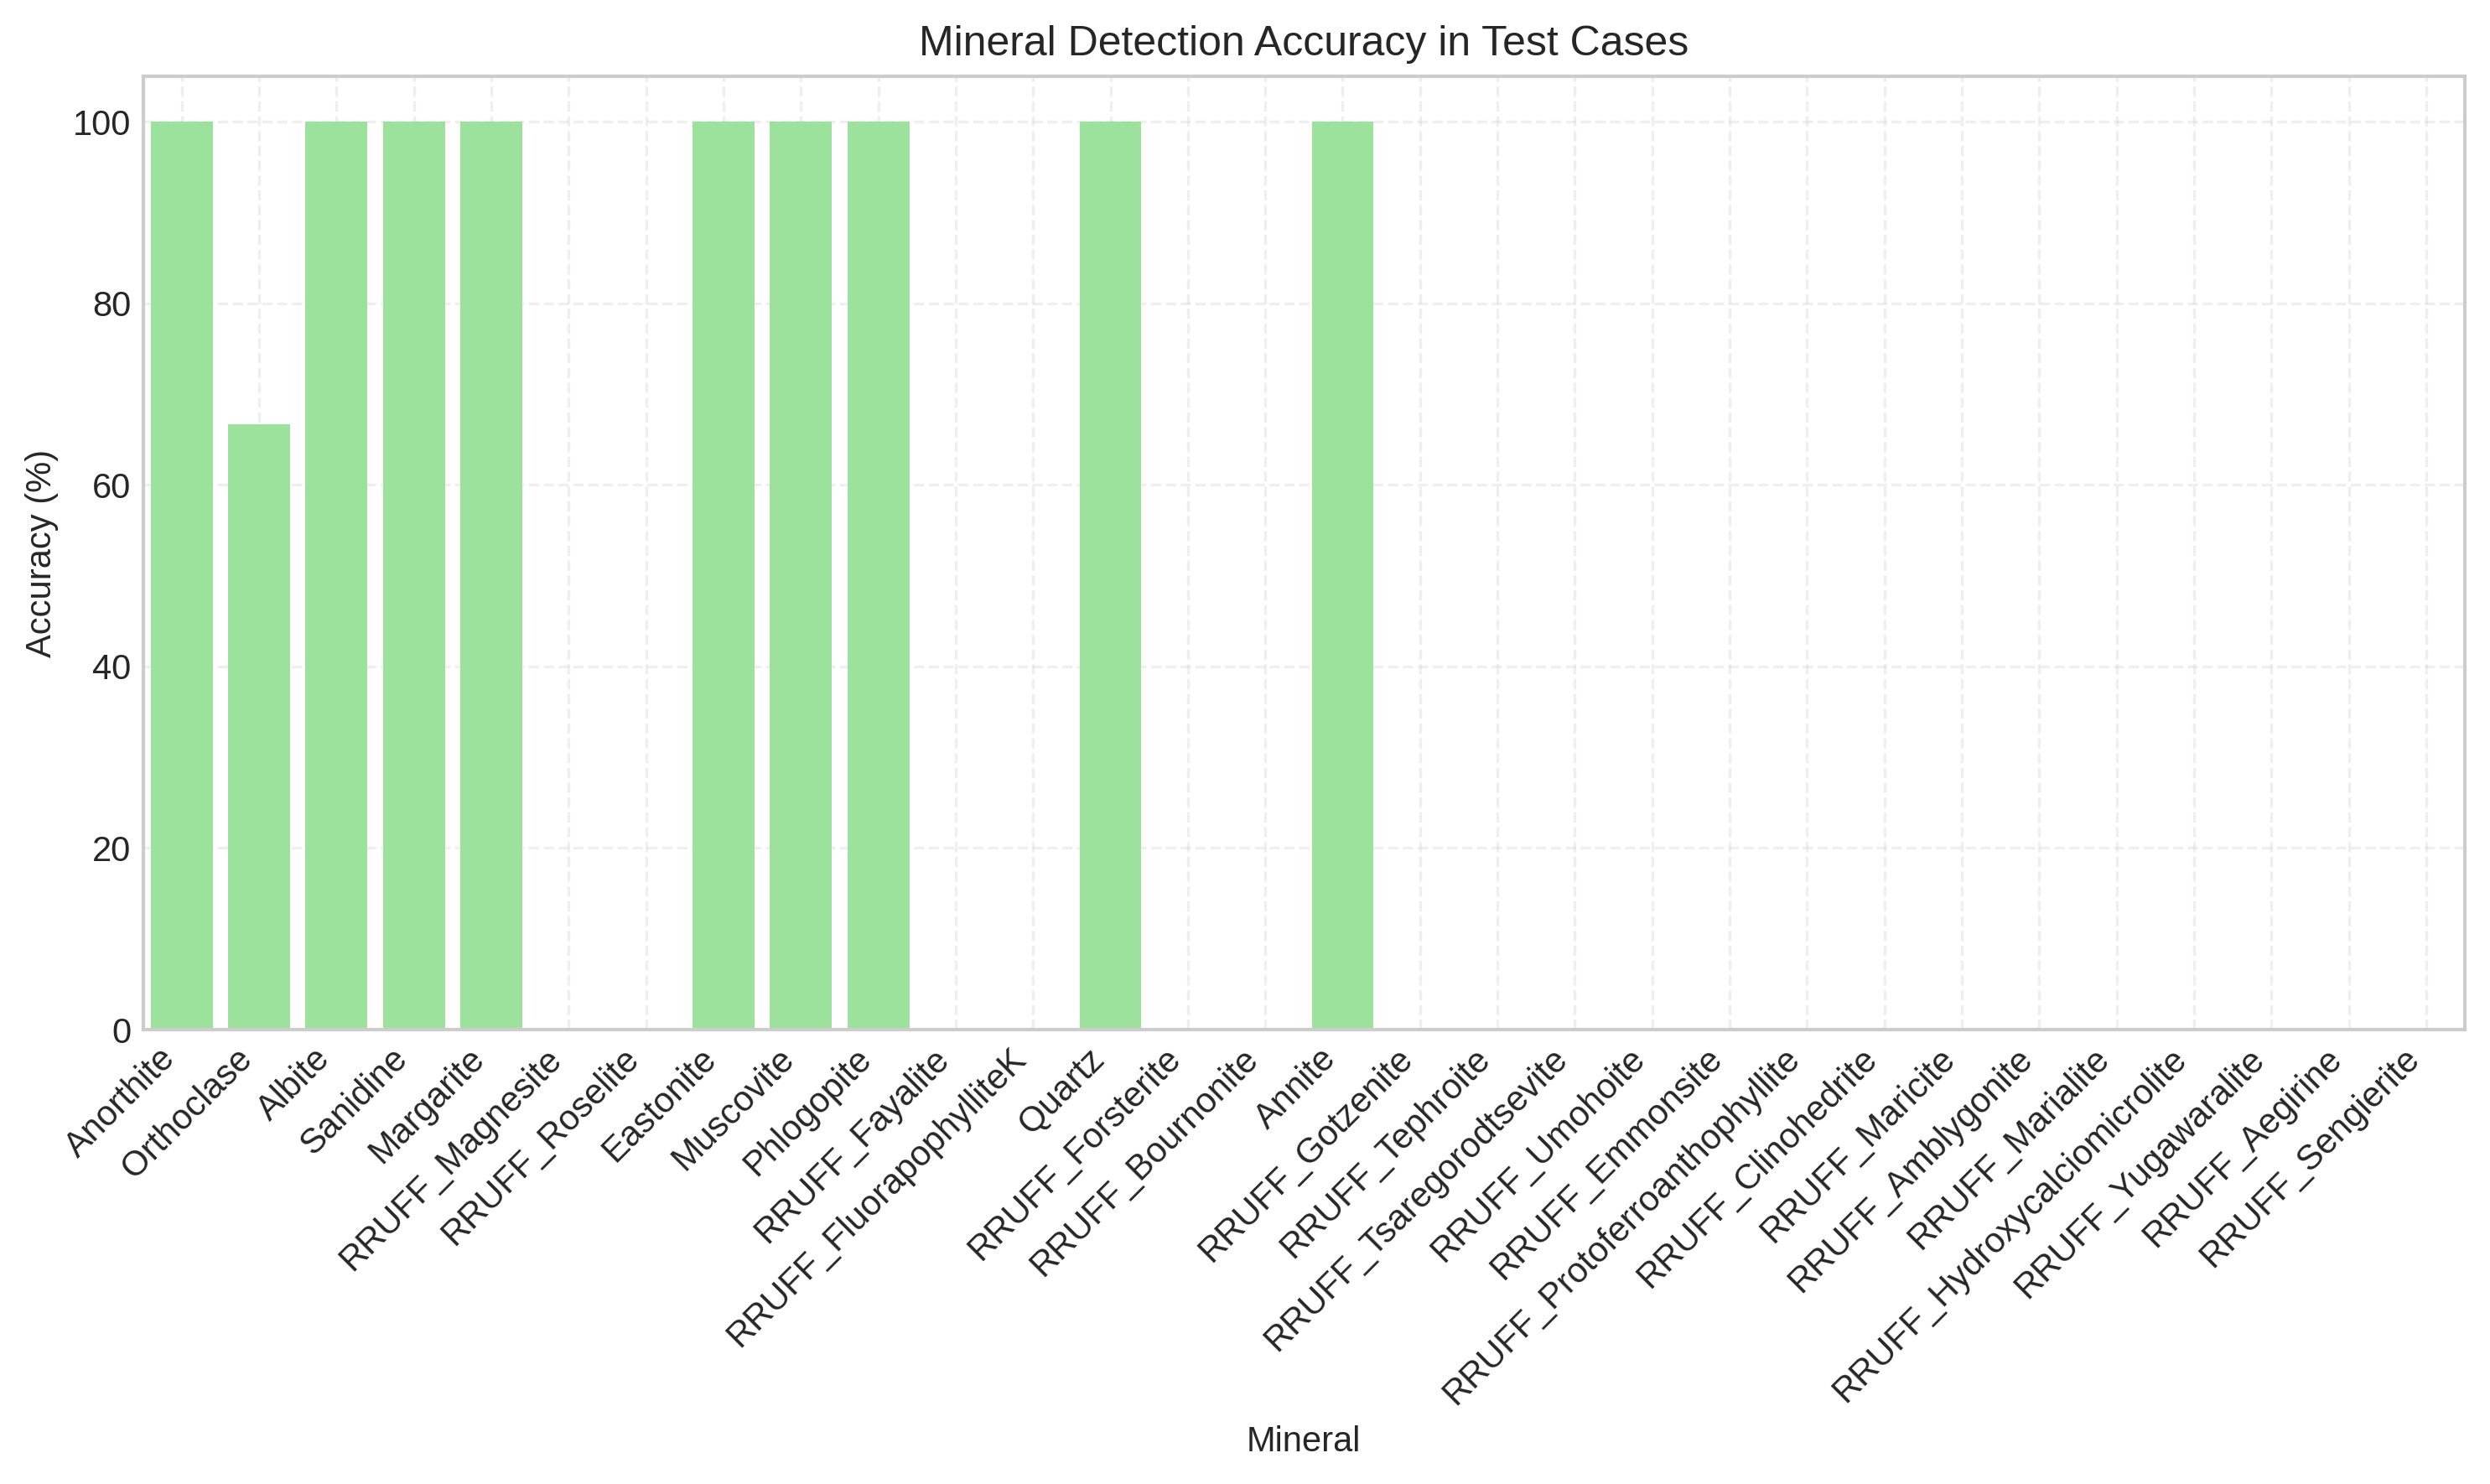


Test Cases Summary:
Overall System Accuracy:
Baseline Model: 75.0%
Uncertainty-Aware Model: 57.2%

Mineral Detection Accuracy: 75.0%

Performance by Rock Type:
  Rock_Type  Baseline  Uncertainty_Aware
    Granite      75.0               68.8
Not Granite      75.0               49.4


In [7]:

total_minerals, correct_minerals = create_mineral_accuracy_plot(ground_truth_data, predictions_data)

# Print summary statistics
print("\nTest Cases Summary:")
print(f"Overall System Accuracy:")
print(f"Baseline Model: {test_results['Baseline_Accuracy'].mean():.1f}%")
print(f"Uncertainty-Aware Model: {test_results['UA_Accuracy'].mean():.1f}%")
print(f"\nMineral Detection Accuracy: {(correct_minerals/total_minerals)*100:.1f}%")
print(f"\nPerformance by Rock Type:")
print(rock_type_performance.round(1).to_string(index=False))


In [8]:
def generate_disagreement_statistics(original_preds, threshold_preds, true_labels, original_acc=None, threshold_acc=None):
    """
    Generate statistics about prediction disagreements between original and threshold-based models.
    
    Args:
        original_preds: List of lists of original predictions
        threshold_preds: List of lists of predictions after applying threshold/uncertainty
        true_labels: List of lists of true labels
        original_acc: Optional accuracy score for original predictions
        threshold_acc: Optional accuracy score for threshold predictions
    
    Returns:
        Dictionary containing statistics by mineral and overall metrics
    """
    stats = {
        'by_mineral': {},
        'overall': {
            'total_disagreements': 0,
            'beneficial_changes': 0,  # Changes that improved prediction
            'harmful_changes': 0,     # Changes that worsened prediction
            'neutral_changes': 0      # Changes to/from unknown that didn't affect correctness
        }
    }
    
    if original_acc is not None and threshold_acc is not None:
        stats['accuracy_change'] = {
            'original_acc': original_acc,
            'threshold_acc': threshold_acc,
            'difference': threshold_acc - original_acc
        }
    
    # Iterate through each sample (list) and each mineral prediction within it
    for orig_sample, thresh_sample, true_sample in zip(original_preds, threshold_preds, true_labels):
        for orig, thresh, true in zip(orig_sample, thresh_sample, true_sample):
            if orig != thresh:
                stats['overall']['total_disagreements'] += 1
                
                if true not in stats['by_mineral']:
                    stats['by_mineral'][true] = {
                        'correctToUnknown': 0,      # Correct → unknown
                        'incorrectToCorrect': 0,    # Wrong → correct
                        'incorrectToUnknown': 0,    # Wrong → unknown
                        'correctToIncorrect': 0,    # Correct → wrong
                        'unknownToCorrect': 0,      # Unknown → correct
                        'unknownToIncorrect': 0,    # Unknown → wrong
                    }
                
                # Track type of disagreement
                if orig == true:
                    if thresh == "unknown":
                        stats['by_mineral'][true]['correctToUnknown'] += 1
                        stats['overall']['neutral_changes'] += 1
                    else:
                        stats['by_mineral'][true]['correctToIncorrect'] += 1
                        stats['overall']['harmful_changes'] += 1
                elif orig == "unknown":
                    if thresh == true:
                        stats['by_mineral'][true]['unknownToCorrect'] += 1
                        stats['overall']['beneficial_changes'] += 1
                    else:
                        stats['by_mineral'][true]['unknownToIncorrect'] += 1
                        stats['overall']['harmful_changes'] += 1
                else:  # orig is incorrect
                    if thresh == true:
                        stats['by_mineral'][true]['incorrectToCorrect'] += 1
                        stats['overall']['beneficial_changes'] += 1
                    elif thresh == "unknown":
                        stats['by_mineral'][true]['incorrectToUnknown'] += 1
                        stats['overall']['neutral_changes'] += 1
                    else:
                        # Wrong prediction to different wrong prediction
                        stats['overall']['neutral_changes'] += 1
    
    return stats

In [9]:
stats = generate_disagreement_statistics(
    original_preds=predictions_data,  # baseline predictions
    threshold_preds=ua_predictions_data,  # uncertainty-aware predictions
    true_labels=ground_truth_data,
    original_acc=sum(accuracy)/len(accuracy),
    threshold_acc=sum(ua_accuracy)/len(ua_accuracy)
)

In [10]:
stats

{'by_mineral': {'Anorthite': {'correctToUnknown': 0,
   'incorrectToCorrect': 0,
   'incorrectToUnknown': 0,
   'correctToIncorrect': 7,
   'unknownToCorrect': 0,
   'unknownToIncorrect': 0},
  'Sanidine': {'correctToUnknown': 0,
   'incorrectToCorrect': 0,
   'incorrectToUnknown': 0,
   'correctToIncorrect': 7,
   'unknownToCorrect': 0,
   'unknownToIncorrect': 0},
  'Margarite': {'correctToUnknown': 1,
   'incorrectToCorrect': 0,
   'incorrectToUnknown': 0,
   'correctToIncorrect': 4,
   'unknownToCorrect': 0,
   'unknownToIncorrect': 0},
  'Orthoclase': {'correctToUnknown': 0,
   'incorrectToCorrect': 5,
   'incorrectToUnknown': 0,
   'correctToIncorrect': 0,
   'unknownToCorrect': 0,
   'unknownToIncorrect': 0},
  'Eastonite': {'correctToUnknown': 0,
   'incorrectToCorrect': 0,
   'incorrectToUnknown': 0,
   'correctToIncorrect': 7,
   'unknownToCorrect': 0,
   'unknownToIncorrect': 0},
  'RRUFF_Fayalite': {'correctToUnknown': 0,
   'incorrectToCorrect': 0,
   'incorrectToUnknown':


Overall Statistics:
Total Disagreements: 44
Beneficial Changes: 5
Harmful Changes: 25
Neutral Changes: 14

Accuracy Changes:
Original Accuracy: 75.00%
Threshold Accuracy: 57.16%
Difference: -17.84%
                          mineral  correctToUnknown  incorrectToCorrect  \
0                       Anorthite                 0                   0   
1                        Sanidine                 0                   0   
2                       Margarite                 1                   0   
3                      Orthoclase                 0                   5   
4                       Eastonite                 0                   0   
5                  RRUFF_Fayalite                 0                   0   
6         RRUFF_FluorapophylliteK                 0                   0   
7                RRUFF_Bournonite                 0                   0   
8                 RRUFF_Gotzenite                 0                   0   
9                 RRUFF_Tephroite                 0

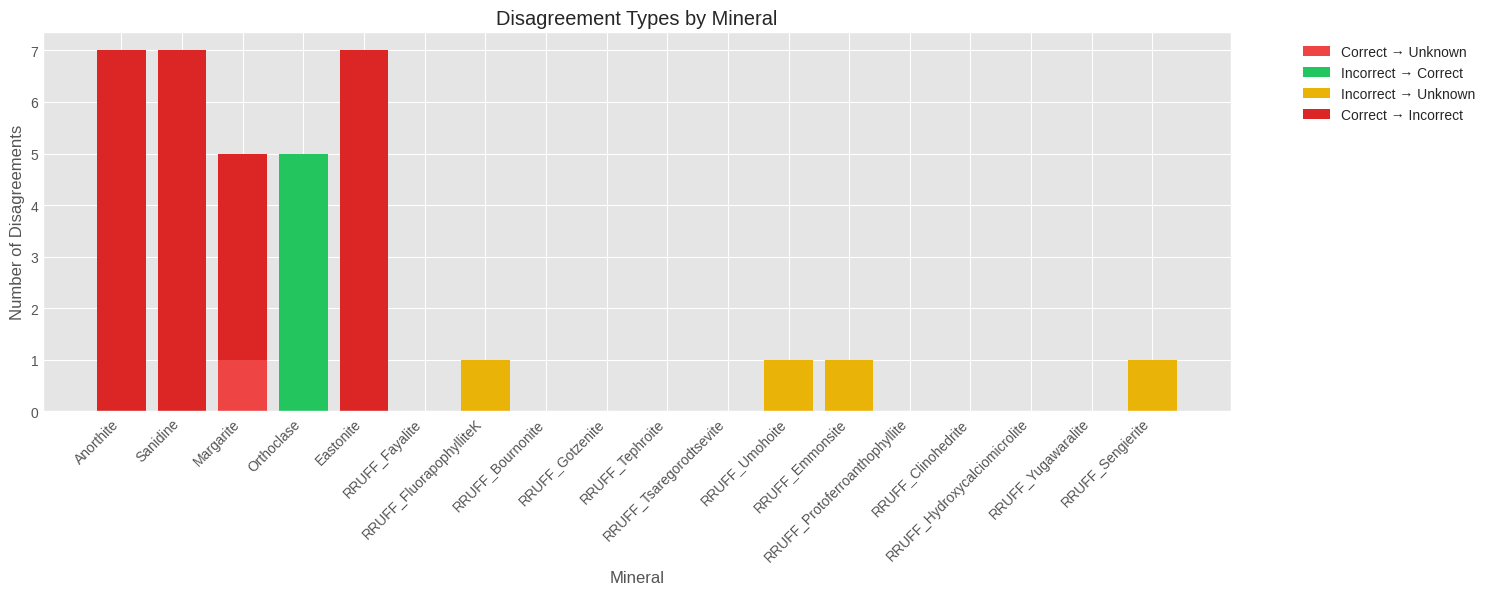

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_disagreement_analysis(stats):
    """
    Create visualizations for disagreement analysis similar to the React component.
    
    Args:
        stats: Dictionary containing disagreement statistics with 'by_mineral' and 'overall' data
    """
    # Print total statistics
    print("\nOverall Statistics:")
    print(f"Total Disagreements: {stats['overall']['total_disagreements']}")
    print(f"Beneficial Changes: {stats['overall']['beneficial_changes']}")
    print(f"Harmful Changes: {stats['overall']['harmful_changes']}")
    print(f"Neutral Changes: {stats['overall']['neutral_changes']}")
    if 'accuracy_change' in stats:
        print(f"\nAccuracy Changes:")
        print(f"Original Accuracy: {stats['accuracy_change']['original_acc']:.2f}%")
        print(f"Threshold Accuracy: {stats['accuracy_change']['threshold_acc']:.2f}%")
        print(f"Difference: {stats['accuracy_change']['difference']:.2f}%")

    # Convert the mineral stats to a DataFrame
    data = []
    for mineral, stats in stats['by_mineral'].items():
        row = {
            'mineral': mineral,
            'correctToUnknown': stats['correctToUnknown'],
            'incorrectToCorrect': stats['incorrectToCorrect'],
            'incorrectToUnknown': stats['incorrectToUnknown'],
            'correctToIncorrect': stats['correctToIncorrect']
        }
        # Calculate net impact
        row['netImpact'] = (row['incorrectToCorrect'] - 
                           row['correctToIncorrect'] - 
                           row['correctToUnknown'])
        data.append(row)
    
    df = pd.DataFrame(data)
    
    # Skip empty data
    if df.empty:
        print("No disagreement data to visualize.")
        return None
    else:
        print(df)
    
    # Create figure with two subplots
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(15, 10))
    
    # # 1. Create table visualization
    # ax1 = plt.subplot2grid((2, 1), (0, 0))
    # table_data = df[['mineral', 'correctToUnknown', 'incorrectToCorrect', 
    #                  'incorrectToUnknown', 'correctToIncorrect', 'netImpact']]
    
    # # Convert numeric columns to string with formatting
    # numeric_cols = ['correctToUnknown', 'incorrectToCorrect', 
    #                'incorrectToUnknown', 'correctToIncorrect', 'netImpact']
    # for col in numeric_cols:
    #     table_data[col] = table_data[col].astype(float).apply(lambda x: f"{x:.0f}")
    
    # # Create table
    # table = ax1.table(
    #     cellText=table_data.values,
    #     colLabels=['Mineral', 'Correct→Unknown', 'Incorrect→Correct', 
    #                'Incorrect→Unknown', 'Correct→Incorrect', 'Net Impact'],
    #     cellLoc='center',
    #     loc='center',
    #     colColours=['#f0f0f0'] * 6
    # )
    
    # # Style the table
    # table.auto_set_font_size(False)
    # table.set_fontsize(9)
    # table.scale(1.2, 1.5)
    
    # # Color the net impact cells based on value
    # for idx, row in enumerate(table_data.values):
    #     net_impact = float(row[-1])  # Convert string back to float for comparison
    #     cell = table[idx + 1, -1]  # +1 to skip header row
    #     if net_impact > 0:
    #         cell.set_facecolor('#90EE90')  # light green
    #     elif net_impact < 0:
    #         cell.set_facecolor('#FFB6C6')  # light red
    
    # ax1.axis('off')
    # ax1.set_title('Model Prediction Disagreement Analysis', pad=20)
    
    # 2. Create stacked bar chart
    ax2 = plt.subplot2grid((2, 1), (1, 0))
    
    # Prepare data for stacked bar chart
    categories = ['correctToUnknown', 'incorrectToCorrect', 
                 'incorrectToUnknown', 'correctToIncorrect']
    colors = ['#ef4444', '#22c55e', '#eab308', '#dc2626']
    labels = ['Correct → Unknown', 'Incorrect → Correct', 
              'Incorrect → Unknown', 'Correct → Incorrect']
    
    bottom = np.zeros(len(df))
    
    for cat, color, label in zip(categories, colors, labels):
        values = df[cat].astype(float).values  # Convert to float for plotting
        ax2.bar(df['mineral'], values, bottom=bottom, label=label, color=color)
        bottom += values
    
    ax2.set_title('Disagreement Types by Mineral')
    ax2.set_xlabel('Mineral')
    ax2.set_ylabel('Number of Disagreements')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

# Example usage:
# stats comes from your generate_disagreement_statistics function
fig = create_disagreement_analysis(stats)
if fig:
    plt.show()